<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Classification Models with Keras</font></h1>


## Introduction


In this lab, we will learn how to use the Keras library to build models for classificaiton problems. We will use the popular MNIST dataset, a dataset of images, for a change. 

The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

Also, this way, will get to compare how conventional neural networks compare to convolutional neural networks, that we will build in the next module.


<h2>Classification Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. Use of MNIST database for training various image processing systems</h5>
<h5> 2. Build a Neural Network </h5>
<h5> 3. Train and Test the Network. </h5>

<p>This link will be used by your peers to assess your project. In your web app, your peers will be able to upload an image, which will then be classified using your custom classifier you connected to the web app. Your project will be graded by how accurately your app can classify <b>Fire</b>, <b>Smoke</b> and <b>Neutral (No Fire or Smoke)</b>.<p>


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item312">Import Keras and Packages</a>      
2.  <a href="#item322">Build a Neural Network</a>     
3.  <a href="#item332">Train and Test the Network</a>     

</font>
</div>


<a id='item312'></a>


## Import Keras and Packages


Let's start by importing Keras and some of its modules.


In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Since we are dealing we images, let's also import the Matplotlib scripting layer in order to view the images.


In [2]:
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). 

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [4]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


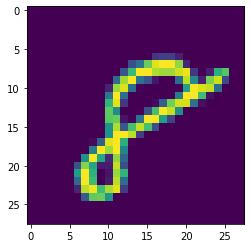

In [8]:
plt.imshow(X_train[59999])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [9]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


In [10]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [11]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [12]:
num_pixels

784

<a id='item322'></a>


## Build a Neural Network


In [13]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(392, activation='relu'))
    model.add(Dense(196, activation='relu'))
    model.add(Dense(98, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<a id='item332'></a>


## Train and Test the Network


In [ ]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 126s - loss: 0.2011 - acc: 0.9391 - val_loss: 0.1025 - val_acc: 0.9700
Epoch 2/10
 - 126s - loss: 0.0944 - acc: 0.9713 - val_loss: 0.0871 - val_acc: 0.9747
Epoch 3/10
 - 126s - loss: 0.0690 - acc: 0.9794 - val_loss: 0.0807 - val_acc: 0.9772
Epoch 4/10
 - 125s - loss: 0.0554 - acc: 0.9832 - val_loss: 0.0819 - val_acc: 0.9771
Epoch 5/10
 - 127s - loss: 0.0455 - acc: 0.9867 - val_loss: 0.0669 - val_acc: 0.9811
Epoch 6/10
 - 127s - loss: 0.0371 - acc: 0.9894 - val_loss: 0.0798 - val_acc: 0.9798
Epoch 7/10
 - 126s - loss: 0.0343 - acc: 0.9898 - val_loss: 0.0752 - val_acc: 0.9814
Epoch 8/10
 - 126s - loss: 0.0301 - acc: 0.9913 - val_loss: 0.0809 - val_acc: 0.9809
Epoch 9/10
 - 125s - loss: 0.0264 - acc: 0.9923 - val_loss: 0.0916 - val_acc: 0.9804
Epoch 10/10


Let's print the accuracy and the corresponding error.


In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [ ]:
model.save('classification_model.h5')

Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.


When you are ready to use your model again, you use the load_model function from <strong>keras.models</strong>.


In [ ]:
from keras.models import load_model

In [ ]:
pretrained_model = load_model('classification_model.h5')

### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Srishti    | Migrated Lab to Markdown and added to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called _Introduction to Deep Learning & Neural Networks with Keras_. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week3_LAB2).


<hr>

Copyright © 2019 [IBM Developer Skills Network](https://cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
